# codecentric.AI Bootcamp - Neuronale Netze und Deep Learning

Hallo und herzlich Willkommen beim codecentric.AI Bootcamp.

Dieses Notebook enthält Beispiele und Übungsaufgaben zu Neuronalen Netzen und Deep Learning.
Eine theoretische Einführung gibt es in diesem [YouTube video](https://youtu.be/Y6Bf3noDTL8).

In [1]:
# lade Video
from IPython.display import IFrame    
IFrame('https://www.youtube.com/embed/Y6Bf3noDTL8', width=850, height=650)

Zu diesem Notebook gibt es ebenfalls ein [Video](https://www.youtube.com/embed/BkWwAF-ezXs), indem ich euch durch diese Beispiele durchführe.

In [2]:
# lade Video
from IPython.display import IFrame    
IFrame('https://www.youtube.com/embed/BkWwAF-ezXs', width=850, height=650)

## Neuronale Netze und Deep Learning

In dieser Lektion geht es darum, zu erfahren, was neuronale Netze eigentlich sind, wie sie lernen und was das Ganze mit Deep Learning zu tun hat.

Neuronale Netze sind wie [Random Forests](https://www.youtube.com/embed/ieF_QjVUNEQ) eine Methode aus dem maschinellen Lernen und können dabei für überwachtes, nicht-überwachtes und Reinforcement Lernen genutzt werden.

Die Idee hinter neuronalen Netzen gibt es bereits seit den 1940er Jahren; entwickelt wurden sie in Anlehung an das menschliche Gehirn, um die Funktionsweise von Nervenzellen mathematisch zu nutzen. Darum nennen wir neuronale Netze auch **ANNs** (Artificial Neural Networks), also künstliche neuronale Netze.

Als Deep Learning bezeichnen wir komplexe und große neuronale Netze, die in der Lage sind, komplexe Aufaben wie Bild- oder Spracherkennung, lösen können. Vor allem durch die stark gestiegene Rechenkraft, durch die Entwicklung von GPUs und TPUs (Tensor Processing Units), große Datenmengen und Frameworks, wie Keras, TensorFlow und PyTorch ist Deep Learning in den letzten Jahren so erfolgreich und beliebt geworden. Deep Learning begegnet uns zum Beispiel in der Spracherkennung und -verarbeitung, im Computer Vision-Bereich, in Recommender- und selbstlernenden Systemen und in vielem mehr.

Die einfachste Art eines ANNs hat nur einen Knoten (auch Neuron genannt), das wird dann als **Perzeptron** bezeichnet. In diesem Neuron werden eingehende Daten verarbeitet und ein Ergebnis daraus berechnet. Diese eingehenden Daten sind dabei jeweils mit einem sogenannten **Gewicht** multipliziert worden; die Gewichte können dabei im Prinzip beliebige Werte annehmen und dienen dazu, das Ergebnis zu modifizieren. Optional kann auch ein sogenannter Bias zu den Daten * Gewichten addiert werden, um eine weitere Ebene der Modifikation zu nutzen.

Aber wie lernen die neuronalen Netze nun eigentlich? Die gelernten Techniken und Prinzipien wollen wir hier an einem Beispiel anwenden.

## Bibliotheken

Zunächst laden wir die grundlegenden Pakete, die wir für die Vorbereitung der Daten benötigten. Dazu gehören

- numpy: NumPy ist das wichtigste Paket für maschinelles Lernen in Python, denn es bietet die nötigen Funktionen für die Arbeit mit Matrizen und n-dimensionalen Arrays, linearer Algebra, und mehr.
- pandas: pandas erleichtert das Arbeiten mit Daten in Python.
- matplotlib: Zum Erstellen von Graphiken und Abbildungen aus unseren Daten nutzen wir matplotlib. Den zusätzlichen Befehl `matplotlib inline` geben wir in unserem Juypter Notebook mit, damit wir die generierten Plots unterhalb des Code-Chunks sehen können.
- h2o: H2O ist eine Machine Learning Bibliothek für verteiltes Lernen auf Clustern; deshalb müssen wir die H2O Instanz zunächst starten, bevor wir mit ihr arbeiten können.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import h2o
h2o.init(nthreads = -1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_181"; OpenJDK Runtime Environment (build 1.8.0_181-8u181-b13-2~deb9u1-b13); OpenJDK 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /usr/local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbmrx_8t2
  JVM stdout: /tmp/tmpbmrx_8t2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbmrx_8t2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,1 month and 25 days
H2O cluster name:,H2O_from_python_unknownUser_kyszq1
H2O cluster total nodes:,1
H2O cluster free memory:,444.5 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


## Daten

Der Datensatz in diesem Beispiel kommt von [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) und als *csv* Datei im Ordner *data* gespeichert worden.

In dieser Tabelle, die wir mit der pandas Funktion `read_csv` einlesen können, finden wir Informationen über Kundenabwanderung (englisch Customer Churn) in der Telekommunikationsbranche. Je der 7043 Reihen stellt einen Kunden dar; für jeden Kunden haben wir 20 Feature, die ihn beschreiben, plus unsere Antwortvariable "Churn", die aussagt, ob der Kunde abgewandert ist, oder nicht.

In [6]:
telco_data = pd.read_csv("/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Zunächst wandeln wir dieses pandas `DataFrame` in ein h2o Frame um:

In [5]:
hf = h2o.H2OFrame(telco_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


Und wir definieren die Feature mit ihren jeweiligen Spaltennamen in der Tabelle. Das erste Feature `customerID` lasse ich hier weg, denn es liefert uns keine Information, die wir für die Vorhersage nutzen können.

In [6]:
hf_X = hf.col_names[1:len(hf.col_names)-1]
hf_X

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

Entsprechend der Feature wird auch die Antwortvariable definiert.

In [7]:
hf_y = hf.col_names[20]
hf_y

'Churn'

Da wir die Kunden in unseren Daten in Klassen einteilen wollen, müssen wir die Antwortvariable in einen Faktor umwandeln.

In [8]:
hf[hf_y] = hf[hf_y].asfactor()  
hf[hf_y].isfactor()

[True]

Nun fehlt nur noch die h2o Funktion für neuronale Netze, der `H2ODeepLearningEstimator`, den wir importieren. Mit dieser Funktion definieren wir das neuronale Netz bevor wir es trainieren. Ein paar der wichtigsten Argumente und was sie bedeuten erkläre ich anhand dieser Funktion.

Die Beschreibung aller Argumente der Funktion ist [in der H2O Dokumentation](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2odeeplearningestimator) zu finden.

In [9]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

### Aktivierungsfunktionen

Was passiert nun während der "Verarbeitung" der eingehenden Daten in einem Neuron eines ANNs? Die einfachste Variante ist, dass alle eingehenden Daten * Gewichten (evtl. + Bias) aufsummiert werden. Diesen Wert könnten wir bereits als Ergebnis betrachten. Diese Art der Berechnung limitiert allerdings die Art der gelernten Zusammenhänge in unseren Daten auf **lineare** Kombinationen der Daten. Da wir neuronale Netze in der Regel für das Lernen von komplexen Zusammenhängen nutzen wollen, brauchen wir eine Möglichkeit, um diese Linearität zu brechen: hier kommen Aktivierungsfunktionen ins Spiel.

Aktivierungsfunktionen normalisieren die die summierten Werte in einem Neuron. Häufig verwendete Aktivierungsfunktionen sind **Tanh** (liefert normierte Ergebnisse zwischen -1 und 1), **Sigmoid** (liefert normierte Ergebnisse zwischen 0 und 1), **ReLU** (Rectified Linear Units, setzen negative Erte auf 0) und viele mehr. Die Aktivierungsfunktion ermöglicht es so, dass wir jedes Problem, dass wir mathematisch abbilden können, approximieren können.

In H2O's `H2ODeepLearningEstimator` können wir aus folgenden Aktivierungsfunktionen wählen: Tanh, Tanh mit Dropout, Rectifier (Defaulteinstellung), Rectifier mit Dropout, Maxout und Maxout mit Dropout. Hier wähle ich Rectifier mit Dropout. Mit **Dropout** kann die Generalisierbarkeit der gelernten Funktion verbessert werden, indem eine spezifierte Anzahl von Neuronen im neuronalen Netz auf Null gesetzt wird. Diesen Wert definieren wir mit dem `hidden_dropout_ratios` Argument, der standardmäßig auf 50% gesetzt ist. Hier will ich die Rate auf 20% verringern. Bevor wir dieses Argument setzen, gehen wir aber erst einen Schritt weiter: zu den **versteckten Schichten**. Zusätzlich kann ein Dropout für die eingehenden Daten gesetzt werden; das `input_dropout_ratio` Argument ist allerdings standardmäßig ausgeschaltet und so wollen wir es hier auch belassen.

In [10]:
dl_model = H2ODeepLearningEstimator(
    activation = "rectifier_with_dropout"
)

## Versteckte Schichten

Die neuronalen Netze, die wir in diesem Beispiel trainieren wollen, sind natürlich komplexer und haben mehrere Neuronen als das Perzeptron vom Anfang. Neuronen sind in ANNs in Schichten angeordnet, durch die Daten und daraus berechnete Ergbenisse von links nach rechts durchfließen. Die erste Schicht ist immer die Eingangsschicht, in der die eingehenden Daten in das Netz fließen. Dann folgende sogenannte versteckte Schichten und schließlichlich gibt es eine Ausgabeschicht, die bei Klassifikationsaufgaben die möglichen Klassen darstellt. Es gibt verschiedene Architekturen von neuronalen Netzen, die beschreiben, wie viele versteckte Schichten und wie viele Neuronen es in jeder der Schichten gibt und wie diese miteinander verbunden sind. Eine einfache Netzarchitektur ist das **Multi-Layer-Perceptron** (MLP), in dem jeder Knoten mit jedem Knoten der vorhergehenden und nachfolgenden Schicht verbunden ist.

So ein MLP können wir mit H2O trainieren, indem wir die Anzahl der versteckten Schichten und die Anzahl der Knoten pro versteckter Schicht mit dem `hidden` Argument definieren. Hier wollen wir 3 versteckte Schichten haben, mit 100, 80 und 100 Knoten. Jetzt können wir die `hidden_dropout_ratios` für jede versteckte Schicht definieren: hier 3x 20% Dropout.

In [11]:
dl_model = H2ODeepLearningEstimator(
    activation = "rectifier_with_dropout",
    hidden = [100, 80, 100],
    hidden_dropout_ratios = [0.2, 0.2, 0.2]
)

## Lernen durch Optimierung

Jede Kante in unserem neuronalen Netz stellt jetzt fließende Daten oder Information dar und wie oben bei dem einfachen Perzeptron beschrieben, wird auch in einem komplexeren MLP jeder Kante ein **Gewicht** zugeordnet. Dieses Gewicht soll jetzt so gewählt werden, dass das von unserem Netz berechnete Ergebnis möglichst nah an der Wirklichkeit ist.

Wie das genau funktioniert, hat mit **mathematischer Optimierung** zu tun und zwar mit einigen wichtigen Konzepten:

- Differenzen zwischen Vorhersage und Wirklichkeit
- Loss-Funktionen
- Backpropagation
- Optimierungsmethoden, wie z.B. Gradient Descent

### Differenzen zwischen Vorhersage und Wirklichkeit

Um die Differenz zwischen Vorhersage und Wirklichkeit in einem Klassifikationsproblem zu berechnen, brauchen wir zunächst die **Softmax**-Funktion. Für jeden Datenpunkt, der das neuronale Netz von links nach rechts durchläuft, kommt am Ende ein Ergebnis in Form eines numerischen Wertes heraus; diesen nennen wir Score. Der Score ist allerdings nicht normiert, dafür nutzen wir die Softmax Funktion, denn sie transformiert die Scores in Wahrscheinlichkeitsverteilungen, das bedeutet in Werte zwischen 0 und 1, die in Summe über alle möglichen Klassen 1 ergeben.

### One-Hot-Encoding

Um diese Wahrscheinlichkeitsverteilungen mit der Wirklichkeit abgleichen zu können, nutzen wir ein bestimmtes Format für unsere Antwortvariable "Churn": den **One-Hot-Encoded Vektor**. Dieser Vektor enthält für jeden Datenpunkt und jede mögliche Klassen entweder den Wert 1 (wenn der Datenpunkt zu der entsprechenden Klasse gehört) oder 0 (wenn der Datenpunkt nicht zu der entsprechenden Klasse gehört).

Aus dem Wahrscheinlichkeitsvektor und dem One-Hot-Encoded Vektor können wir nun die Differenz bilden. Je kleiner die Differenz, desto näher ist unsere Vorhersage an der Wirklichkeit dran. Ziel des Lernprozesses ist es nun, die Gewichte so zu wählen, dass diese Differenz so klein wie möglich wird.

One-Hot-Encoding können wir auch für Feature-Variablen anwenden, denn ein neuronales benötigt numerische Werte, um zu Lernen - mit Kategorien und Strings kann es erstmal nichts anfangen. In H2O passiert das One-Hot-Encoding automatisch, wir könnten aber mit dem `categorical_encoding` auch eine der folgenden Vorgehensweisen spezifizieren: "enum", "one_hot_internal", "one_hot_explicit", "binary", "eigen", "label_encoder", "sort_by_response" und "enum_limited". Hier belassen wir es bei der Defaulteinstellung "auto".

### Loss-Funktionen

Die durchschnittliche Differenz zwischen Vorhersage und Wirklichkeit, die wir nun minimieren wollen, wir **Loss** genannt. Wir können unterschiedliche Loss-Funktionen nutzen, meist wird für Klassifikationsprobleme die **Kreuzentropie** verwendet. In H2O können wir mit dem `loss`-Argument zwischen den folgenden Funktionen wählen: "cross_entropy", "quadratic", "huber", "absolute" und "quantile". Hier wollen wir mit der Kreuzentropie arbeiten.

In [12]:
dl_model = H2ODeepLearningEstimator(
    categorical_encoding = "auto",
    activation = "rectifier_with_dropout",
    hidden = [100, 80, 100],
    hidden_dropout_ratios = [0.2, 0.2, 0.2],
    loss = "cross_entropy"
)

### Backpropagation

Mittels Backpropagation wird nun der berechnete Fehler aus der Differenz zwischen Vorhersage und Wirklichkeit rückwärts von rechts nach links durch unser neuronales Netz zurück gerechnet. So wir der anteilige Fehler für jedes Neuron bestimmt. Daraus ergibt sich ein Fehler-**Gradient**, den wir uns wie eine Hügellandschaft vorstellen können. Verschiedene Punkte in der Landschaft stellen analog verschiedene Gewichte dar, die Höhen und Tiefen an den jeweiligen Punkten stellen den Fehler dar. Wären wir nun ein Bergsteiger, der mit verbundenen Augen irgendwo in dieser Landschaft abgesetzt wird, ist seine Aufgabe, den tiefsten Punkt in der Landschaft mit dem geringsten Fehler zu finden.

### Gradientenoptimierung

Diesen tiefsten Punkt in der Fehlerlandschaft sucht nun auch unser neuronales Netz. Und zwar tut es das, indem es - ähnlich wie der Bergsteiger - sich in mehreren Schritten diesem **Minimum** nähert. Jeder Schritt entspricht einer **Trainingsepoche**. In jeder Epoche wird der Gradient bestimmt und die Richtung mit dem stärksten Abstieg gefunden; dort wird der nächste Schritt hingesetzt und die Gewichte werden entsprechend geändert, so dass der Fehler in der nächsten Runde geringer ist als vorher. Das passiert solange, bis kein Abstieg mehr möglich ist und (idealerweise) die Gewichte mit dem niedrigsten Fehler gefunden wurden. In H2O definieren wir die Anzahl der Epochen mit dem `epochs`-Argument. Hier wählen wir 200 Epochen.

In [13]:
dl_model = H2ODeepLearningEstimator(
    categorical_encoding = "auto",
    activation = "rectifier_with_dropout",
    hidden = [100, 80, 100],
    hidden_dropout_ratios = [0.2, 0.2, 0.2],
    loss = "cross_entropy",
    epochs = 200
)

### Adaptive Lernrate und Momentum

Nun kann es leicht passieren, dass wir mit dieser Technik in einem lokalen Minimum versacken: es gibt keinen **Gradientenabstieg** mehr aber das globale Minimum liegt vielleicht hinter dem nächsten Berg - über den wir nun nicht hinweg kommen. Um dieses Problem zu umgehen, gibt es mehrere Tricks, einer davon ist eine **adaptive Lernrate** zu wählen. Die **Lernrate** können wir uns wie die Schrittgröße des Bergsteigers vorstellen. Wir können die Lernrate in H2O einstellen, indem wir das `rate` Argument setzen. Per Default ist sie auf 0.005 gesetzt, höhere Werte machen das Modell weniger stabil, niedrigere Werte führen zu langsamerer Konvergenz. Darum lassen wir hier den Standardwert stehen. Bei einer adaptiven Lernrate können wir zum Beispiel mit größeren Schritten starten und die Schritte verkleinern, wenn wir uns dem Minimum nähern. In H2O ist das Argument `adaptive_rate` per Default angeschaltet. Da wir aber Momentum nutzen wollen, darf `adaptive_rate` nicht aktiviert sein und wir setzen es auf `False`. Weitere Argumente, mit denene sich die Lernrate anpassen lässt, sind `rho` (Decay-Rate) und `epsilon` (Smoothing-Faktor). 

Eine andere Weiterentwicklung des einfachen Gradientenabstiegs ist **Momentum**. Momentum können wir uns vorstellen, wie einen Ball, der die Hügellandschaft hinab rollt: der Ball wird eine ungefähre Richtung beibehalten und keine zu extremen Sprünge zu den Seiten machen. In H2O können wir die Argumente `momentum_start` (Momentum zu Beginn des Trainings), `momentum_ramp` (Anzahl Trainingsinstanzen, für die Momentum ansteigen soll) und `momentum_stable` (Finales Momentum nach momentum_ramp)

Aus dem Momentum hat sich der sogenannte **Nesterov-beschleunigte Gradient** entwickelt; bei dieser Methode wird der nächste Schritt geschätzt, bevor er gegangen wird, so dass vorherige Fehler in die Richtungsentscheidung bei jedem Schritt beitragen. Auch das Argument `nesterov_accelerated_gradient` ist standardmäßig aktiviert.

In [14]:
dl_model = H2ODeepLearningEstimator(
    categorical_encoding = "auto",
    activation = "rectifier_with_dropout",
    hidden = [100, 80, 100],
    hidden_dropout_ratios = [0.2, 0.2, 0.2],
    loss = "cross_entropy",
    epochs = 200,
    rate = 0.005,
    adaptive_rate = False,
    momentum_start = 0.5,
    momentum_ramp = 100,
    momentum_stable = 0.99,
    nesterov_accelerated_gradient = True
)

### L1 und L2 Regularisierung

Eine weitere Technik, um die Generalisierbarkeit eines neuronalen Netzes zu verbessern ist **Regularisierung** (andere waren Kreuzvalidierung und Dropout). In H2O können wir `l1` und `l2` Regularisierung einstellen. In der L1-Regularisierung werden ähnlich wie beim Dropout einige Knoten 0-Werte erhalten, bei L2-Regularisierung werden viele Gewichte niedrig gesetzt. Hier lassen wir allerdings den Defaultwert von 0 für beide Hyperparameter stehen.

In [15]:
dl_model = H2ODeepLearningEstimator(
    categorical_encoding = "auto",
    activation = "rectifier_with_dropout",
    hidden = [100, 80, 100],
    hidden_dropout_ratios = [0.2, 0.2, 0.2],
    loss = "cross_entropy",
    epochs = 200,
    rate = 0.005,
    adaptive_rate = False,
    momentum_start = 0.5,
    momentum_ramp = 100,
    momentum_stable = 0.99,
    nesterov_accelerated_gradient = True,
    l1 = 0,
    l2 = 0
)

### Kreuzvalidierung

In der [Dokumentation](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2odeeplearningestimator) können wir sehen, dass es eine Reihe weitere Argumente für Hyperparameter gibt. Die wollen wir nicht alle im Einzelnen durchgehen; was wir für unseren Trainingslauf aber noch brauchen sind **Validierungsdaten**. Wir könnten entweder ein explizites **Validierungsset** mit `validation_frame` angeben oder wir nutzen **Kreuzvalidierung**. Um letzteres zu definieren, nutzen wir `nfolds` (die Anzahl an Folds auf denen validiert werden soll) und `fold_assignment`. Mit `stratified` legen wir fest, dass die Verhältnisse der Klassen zueinander in den Folds beibehalten werden sollen, im Gegensatz zu komplett zufälliger Aufteilung der Instanzen in die Folds. Mit `keep_cross_validation_predictions = True`können wir die Ergebnisse der Kreuzvalidierung speichern und später zum Beispiel plotten.

In [16]:
dl_model = H2ODeepLearningEstimator(
    categorical_encoding = "auto",
    activation = "rectifier_with_dropout",
    hidden = [100, 80, 100],
    hidden_dropout_ratios = [0.2, 0.2, 0.2],
    loss = "cross_entropy",
    epochs = 200,
    rate = 0.005,
    adaptive_rate = False,
    momentum_start = 0.5,
    momentum_ramp = 100,
    momentum_stable = 0.99,
    nesterov_accelerated_gradient = True,
    l1 = 0,
    l2 = 0,
    nfolds = 3,
    fold_assignment = "stratified",
    keep_cross_validation_predictions = True,
    seed = 42
)

Als letztes setzen wir noch einen Seed für die Pseudozufallszahlengenerierung.

## Modelltraining

Nun können wir das so definierte neuronale Netz trainieren. Dafür verwenden wir die `train` Funktion und geben ihr die Vektoren mit Antwortvariable (`y`) und Features (`x`), sowie den Trainingsdatensatz (`training_frame`) mit.

In [17]:
dl_model.train(x = hf_X, 
               y = hf_y, 
               training_frame = hf)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


Dieses Modell können wir nun auf verschiedene Weisen weiter nutzen: Wir können verschiedene Performance-Metriken auf neuen (Test-) Daten berechnen lassen, das Modell speichern oder die Trainingsergebnisse in verschiedenen Abbildungen darstellen. Die Trainingsmetriken können wir zum Beispiel in einem Plot darstellen:

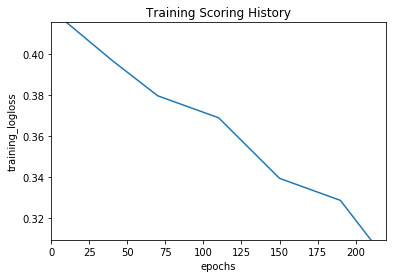

In [18]:
dl_model.plot()

Die Kreuzvalidierungsergebnisse können wir mit den Funktionen `cross_validation_predictions` (eine Tabelle pro Fold) und `cross_validation_holdout_predictions` (alle Ergebnisse kombiniert).

In [19]:
cv_preds = dl_model.cross_validation_predictions()
cv_preds

predict,No,Yes
No,0,0
No,0.913982,0.0860181
No,0,0
No,0.931805,0.0681954
Yes,0.228222,0.771778
Yes,0.224294,0.775706
Yes,0.492414,0.507586
No,0.674481,0.325519
Yes,0.574148,0.425852
No,0.947142,0.0528578


predict,No,Yes
Yes,0.432905,0.567095
No,0,0
Yes,0.662877,0.337123
No,0,0
No,0,0
No,0,0
No,0,0
No,0,0
No,0,0
No,0,0


predict,No,Yes
No,0,0
No,0,0
No,0,0
No,0,0
No,0,0
No,0,0
No,0,0
No,0,0
No,0,0
No,0,0


[, , ]

In [20]:
cv_preds_comb = dl_model.cross_validation_holdout_predictions()
cv_preds_comb.head()

predict,No,Yes
Yes,0.432905,0.567095
No,0.913982,0.0860181
Yes,0.662877,0.337123
No,0.931805,0.0681954
Yes,0.228222,0.771778
Yes,0.224294,0.775706
Yes,0.492414,0.507586
No,0.674481,0.325519
Yes,0.574148,0.425852
No,0.947142,0.0528578


In [21]:
h2o.shutdown(prompt=False)

[WARNING] in <ipython-input-21-02ff3806b010> line 1:
    >>> h2o.shutdown(prompt=False)
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_8587 closed.
